# Analysis of Bubble Tea Shops in DMV

### By Jason Chen

### CMSC 320 Final Tutorial

## Project Outline

1. Introduction
    * A. Background
    * B. Libraries Used
2. Data Collection
    * A. About the Dataset
    * B. Retrieving the Dataset
3. Data Wrangling
4. Data Visualization and Analysis
5. Conclusion

## 1. Introduction 

### 1A. Background

[Bubble tea](https://en.wikipedia.org/wiki/Bubble_tea) (also known as boba) is a Taiwanese tea-based drink invented in the 1980s. It most commonly consists of tea and comes with tapioca balls (bubbles) as toppings, but other toppings can be used as well such as coconut jelly, grass jelly, and red bean.
<script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/2884_RC01/embed_loader.js"></script> <script type="text/javascript"> trends.embed.renderExploreWidget("TIMESERIES", {"comparisonItem":[{"keyword":"bubble tea","geo":"US","time":"2004-01-01 2022-05-07"}],"category":0,"property":""}, {"exploreQuery":"date=all&geo=US&q=bubble%20tea","guestPath":"https://trends.google.com:443/trends/embed/"}); </script>
The United States has recently witnessed a significant growth of the bubble tea market over the years. According to Google Trends, the popularity of Bubble tea in the United States has grown exponentially in the last few years. 
Each Bubble tea shop has their own unique drinks as well as common ones. Some shops are known for their toppings such as cheese foam or brown sugar bubbles.

In this tutorial, I will observe and analyze the potential trends of bubble tea shops in the DMV.

### 1B. Libraries Used
1. requests 
2. pandas
3. matplotlib
4. seaborn
5. folium
6. re
7. sklearn
8. statsmodels

In [356]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import re

## 2. Data Collection

### 2A. About the Dataset
The dataset used in my analysis is retrieved using the Yelp Fusion API. Using the API, I searched all boba/bubble tea shops within the DMV area (Washing D.C., Maryland, Virginia). I used the API's /businesses/search endpoint to get information about the business. The endpoint returns a json body that contains the business name, rating, price, review count, location, contact, and miscellaneous information. 
Yelp's Fusion API allows many different parameters when calling the /businesses/search endpoint but for the analysis we only need to focus on limit, location, term, categories, and offset. 
Parameters: 
* limit, offset - used to iterate over all the businesses returned by the API call.
* location - used to filter bubble tea shops only in the DMV location.
* term, categories - used to filter searches to only those categorized as bubble tea shops.

In order to access and use the Yelp Fusion API, you need to create an app with Yelp to obtain an API key. To create one, follow the steps [here](https://www.yelp.com/developers/documentation/v3/authentication). 
Alternatively, to skip this step, I have downloaded the data I obtained from the API into a csv so it can be stored and used locally without having to access the API. 



In [357]:
api_key = '' # Enter your API key
def get_businesses(location, api_key):
  headers = {'Authorization': 'Bearer %s' % api_key}
  url = 'https://api.yelp.com/v3/businesses/search'
  data = []
  for offset in range(0, 1000, 50):
    params = {
        'limit': 50, 
        'location': location,
        'term' : 'bubble tea',
        'categories' : 'bubbletea, boba',
        'offset': offset
    }

    r = requests.get(url, headers=headers, params=params)
    if r.status_code == 200:
        data += r.json()['businesses']
    elif r.status_code == 400:
      print('400 Bad Request')
      break

  return data

### 2B. Retrieving the Dataset

First I will call my function to request data from the API and then putting the data into a pandas dataframe for easily manipulation for my analysis. 

In [358]:
data = get_businesses("MD, Maryland, VA, Virginia, DC, Washington DC", api_key)

In [467]:
df = pd.DataFrame(data)
# df.to_csv("E:\CMSC320_Final_Tutorial\Boba-Analysis\data.csv")
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,NBbDXp3rHgCJ0QUCfFJRmg,tan-cha-annandale-2,Tan-Cha,https://s3-media2.fl.yelpcdn.com/bphoto/poGLXm...,False,https://www.yelp.com/biz/tan-cha-annandale-2?a...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 38.813181296474674, 'longitude': ...",[],$$,"{'address1': '6920A Bradlick Shopping Ctr', 'a...",+15713315843,(571) 331-5843,4943.928682
1,FR7sZVFKPmWlLcRZQcY_BQ,bobapop-tea-bar-merrifield-falls-church-2,BoBaPoP Tea Bar - Merrifield,https://s3-media4.fl.yelpcdn.com/bphoto/yna02R...,False,https://www.yelp.com/biz/bobapop-tea-bar-merri...,95,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 38.8736868, 'longitude': -77.226773}",[],$$,"{'address1': '2831 Gallows Rd', 'address2': No...",+14348124173,(434) 812-4173,8009.090186
2,eS1iXKcOnpHc1GozXuve3g,gong-cha-annandale-7,Gong Cha,https://s3-media1.fl.yelpcdn.com/bphoto/9oWiQi...,False,https://www.yelp.com/biz/gong-cha-annandale-7?...,134,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 38.831325, 'longitude': -77.197176}","[pickup, delivery]",$$,"{'address1': '4230 Annandale Rd', 'address2': ...",+17033333117,(703) 333-3117,4856.757323
3,8cF3ogHF6F_UqTUovgUQsg,kung-fu-tea-burke,Kung Fu Tea,https://s3-media2.fl.yelpcdn.com/bphoto/zEr87j...,False,https://www.yelp.com/biz/kung-fu-tea-burke?adj...,71,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 38.7783375368797, 'longitude': -7...","[pickup, delivery]",$,"{'address1': '9530B Old Keene Mill Rd', 'addre...",+17033725289,(703) 372-5289,3993.999083
4,XO4FhUW-MgS-T9BRfVKFVA,bubble-mochi-vienna,Bubble Mochi,https://s3-media4.fl.yelpcdn.com/bphoto/ehNw4V...,False,https://www.yelp.com/biz/bubble-mochi-vienna?a...,32,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",4.5,"{'latitude': 38.90042, 'longitude': -77.26714}",[],$$,"{'address1': '155 Maple Ave W', 'address2': 'U...",+15714075030,(571) 407-5030,11151.011538


## 3. Data Wrangling

The API returns several categories, some of which are not needed for the analysis so we will drop those. 
The ones we will keep in our dataframe are:
* name - name of business
* review_count - number of reviews for business
* rating - average rating for business
* coordinates - latitude and logitude of business
* price - approximate cost per person

Yelp uses dollar signs (\$) to categorize approximate cost per person for a meal in a shop. 
In particular, "$" means under $10; “$$” means “$11-$30”; “$$$” means “$31-$60”; and “$$$$” means “above $61”. 

* location - address of business
* distance - distance from search location

Categories such as coordinates and location are in the form of a json so we will seperate them into their own columns and drop any that are not needed.
The ones we will keep in our dataframe are:
* latitude
* longitude
* city 
* state

In [468]:
# Filter by shops that are open only
df = df[df['is_closed'] == False]

In [469]:
# Drop columnms that are not needed
df.drop(['alias', 'id', 'is_closed', 'image_url', 'url', 'categories', 'phone', 'display_phone'], axis=1, inplace=True)

# Separate json into their own columns
df_lat_lon = pd.json_normalize(df['coordinates'])
df_city_state = pd.json_normalize(df['location'])

# Drop columnms that are not needed
df_city_state.drop(['address1', 'address2', 'address3', 'zip_code','country', 'display_address'], axis=1, inplace=True)
df = pd.concat([df, df_lat_lon, df_city_state], axis=1, join='inner')

# Drop columnms that are not needed
df.drop(['coordinates', 'location'], axis=1, inplace=True)
df

,name,review_count,rating,transactions,price,distance,latitude,longitude,city,state
0,Tan-Cha,96,4.5,[],$$,4943.928682,38.813181,-77.183969,Annandale,VA
1,BoBaPoP Tea Bar - Merrifield,95,4.5,[],$$,8009.090186,38.873687,-77.226773,Falls Church,VA
2,Gong Cha,134,4.0,"[pickup, delivery]",$$,4856.757323,38.831325,-77.197176,Annandale,VA
3,Kung Fu Tea,71,4.0,"[pickup, delivery]",$,3993.999083,38.778338,-77.273388,Burke,VA
4,Bubble Mochi,32,4.5,[],$$,11151.011538,38.900420,-77.267140,Vienna,VA
...,...,...,...,...,...,...,...,...,...,...
237,Monster Tea,10,3.0,[],NaN,29832.520214,39.052860,-77.121170,Rockville,MD
238,Kokee Tea at Arundel Mills Mall,1,4.0,[],NaN,59485.348639,39.157807,-76.724818,Hanover,MD
239,Asian Bakery Cafe,203,3.5,[delivery],$,33191.712120,39.093413,-77.152965,Rockville,MD
240,Tea.com,1,2.0,[],NaN,39028.231157,39.152634,-77.206482,Gaithersburg,MD


Now that we have our data in a dataframe and all the columns we want, we can start cleaning up some of the data. 

Bubble tea shops are often part of a franchise so they would share the same name. We will use the name in our analysis later so we have to make sure all franchises have the same name inside the dataframe as the data from the API may differ. There could be misspellings or added symbolsl to the name so we will have to fix that.
In our current data there are some names separates by a ' - ' with their location behind the shop name. We want to only keep the shop name and remove the ' - ' and anything after it so shops that are part of the same franchise will have the same name when analyzing. For example "Gong Cha - North Bethesda" is part of the Gong Cha Bubble tea franchise but has a different name since it has an added location.
These are some of the differing shop names.

In [470]:
name_counts = df['name'].value_counts().reset_index()
name_counts = name_counts.rename(columns={'index':'name', 'name':'count'})
name_counts[name_counts['name'].str.contains(' - ')]

,name,count
17,Jumbo Jumbo Cafe - Germantown,1
23,Den Da Coffee - Towson,1
39,Kokee Tea - Annapolis,1
47,Kung Fu Tea - Ellicott City,1
53,Java Loco - Falls Church,1
60,Class 520 - Rockville,1
66,Gong Cha - North Bethesda,1
109,Supreme Barbeque - AunTea Boba,1
110,Ben Gong's Tea - Fairfax,1
118,BoBaPoP Tea Bar - Kentlands,1


Next, we will remove clean up those names and also check for any white spaces and mispellings of shop names by adding a common name (no white space, all lower case) to all shops. 

In [471]:
format_names = []
for row in range(len(name_counts)):
    n = re.split(r'( \- )', name_counts['name'][row])[0].replace(' ', '').lower()
    format_names.append(n)  

name_counts = pd.concat([name_counts, pd.Series(format_names).rename('common_name')], axis=1)
name_counts

,name,count,common_name
0,Kung Fu Tea,28,kungfutea
1,Gong Cha,15,gongcha
2,Kokee Tea,6,kokeetea
3,Panda Tea House,3,pandateahouse
4,Tea Mansion,3,teamansion
...,...,...,...
177,Sharetea Germantown,1,shareteagermantown
178,TBaar,1,tbaar
179,Gong Cha & Fuji Teriyaki Grill,1,gongcha&fujiteriyakigrill
180,Simply Sip Tea,1,simplysiptea


Now that each shop has their corresponding common name, we can check duplicate entries to find differing names for shops under the same franchise.

In [472]:
# List of duplicate names to be combined
is_duplicate = name_counts['common_name'].value_counts() > 1
duplicate_names = (is_duplicate.loc[is_duplicate].index).to_list()

duplicate_names

["bengong'stea",
 'kokeetea',
 'javaloco',
 'bobapopteabar',
 'kungfutea',
 'class520',
 'sharetea',
 'jumbojumbocafe',
 'tigersugar',
 'mr.wish',
 'gongcha',
 'vivibubbletea']

In [473]:
name_counts = (name_counts.loc[name_counts['common_name'].isin(duplicate_names)]
                .sort_values(by='common_name'))

name_counts

,name,count,common_name
110,Ben Gong's Tea - Fairfax,1,bengong'stea
9,Ben Gong's Tea,2,bengong'stea
43,Bengong's Tea,1,bengong'stea
118,BoBaPoP Tea Bar - Kentlands,1,bobapopteabar
156,BoBaPoP Tea Bar - Merrifield,1,bobapopteabar
138,BobaPop Tea Bar - Germantown,1,bobapopteabar
60,Class 520 - Rockville,1,class520
35,Class 520,1,class520
66,Gong Cha - North Bethesda,1,gongcha
1,Gong Cha,15,gongcha


In [474]:
# Formatted names (lowercase & removed white space) back to shop names and any addition names to be hard coded ex. Names with city added to the end without separator
new_names = {
            'kokeetea' : 'Kokee Tea',
            'bobapopteabar' : 'BoBaPoP Tea Bar',
            'javaloco' : 'Java Loco',
            'kungfutea' : 'Kung Fu Tea',
            'mr.wish' : 'Mr. Wish',
            'tigersugar' : 'Tiger Sugar',
            'class520' : 'Class 520',
            'sharetea' : 'Share Tea',
            'vivibubbletea' : 'Vivi Bubble Tea',
            'jumbojumbocafe' : 'Jumbo Jumbo Cafe',
            "bengong'stea" : "Ben Gongs Teas",
            'gongcha' : 'Gong Cha'
            }

name_counts['common_name'] = name_counts['common_name'].replace(new_names)
name_counts

,name,count,common_name
110,Ben Gong's Tea - Fairfax,1,Ben Gongs Teas
9,Ben Gong's Tea,2,Ben Gongs Teas
43,Bengong's Tea,1,Ben Gongs Teas
118,BoBaPoP Tea Bar - Kentlands,1,BoBaPoP Tea Bar
156,BoBaPoP Tea Bar - Merrifield,1,BoBaPoP Tea Bar
138,BobaPop Tea Bar - Germantown,1,BoBaPoP Tea Bar
60,Class 520 - Rockville,1,Class 520
35,Class 520,1,Class 520
66,Gong Cha - North Bethesda,1,Gong Cha
1,Gong Cha,15,Gong Cha


We will replace the misspeled names with their correct franchise names. 
Some shop names were not caught when doing our inital cleaning. These names have extra words, special characters, or locations that can't be easily filtered so we will have to manually convert them.

In [475]:
# Dictionary of old names and correct shop names
replace_duplicates = dict(zip(name_counts['name'], name_counts['common_name']))
# Combine same bubble tea shop with different names into correct shop name
df['name'] = df['name'].replace(replace_duplicates)

extra_names = {
    'Ben Gong’s Tea - Annandale' : 'Ben Gongs Teas',
    'Kung Fu Tea II' : 'Kung Fu Tea',
    'Kokee Tea at Arundel Mills Mall' : 'Kokee Tea',
    'Gong Cha Arundel Mills' : 'Gong Cha',
    'Gong Cha Chantilly' : 'Gong Cha',
    'Gong Cha Springfield' : 'Gong Cha',
    'Gongcha Arlington' : 'Gong Cha',
    'Gong Cha & Fuji Teriyaki Grill' : 'Gong Cha',
    'Tea-Do Ellicott City' : 'Tea-Do',
    'Chatime Federal Hill' : 'Chatime',
    'ChaTime White Marsh' : 'Chatime',
    'Jumbo Jumbo Cafe Asia Taste' : 'Jumbo Jumbo Cafe',
    "Jasmine's Smoothie World" : 'Jasmine Smoothie World And Bubble Tea',
    'Donutchew - Fair Oaks Mall' : 'Donutchew',
    'Donutchew Annandale' : 'Donutchew',
    'Mr Wish' : 'Mr. Wish'
}
df['name'] = df['name'].replace(extra_names)

Let's display the counts of the bubble tea shops again. We see that the franchise shops such as Kung Fu Tea and Gong Cha have increased showing that we successfully fixed the names of those shops. 

In [476]:
df['name'].value_counts()

Kung Fu Tea                     30
Gong Cha                        21
Kokee Tea                        9
Ben Gongs Teas                   5
Jumbo Jumbo Cafe                 4
                                ..
Lily Bubble Tea and Smoothie     1
Moge Tee Rockville               1
Moge Tee                         1
Teaism - Penn Quarter            1
Panda Express                    1
Name: name, Length: 152, dtype: int64

We are finally done cleaning our data!

Now we can start creating visualizations and analyze the data.

## 3. Data Visualization and Analysis

After parsing and cleaning, our DataFrame now looks like this. 

In [ ]:
df

,name,review_count,rating,transactions,price,distance,latitude,longitude,city,state
0,Tan-Cha,96,4.5,[],$$,4943.928682,38.813181,-77.183969,Annandale,VA
1,BoBaPoP Tea Bar,95,4.5,[],$$,8009.090186,38.873687,-77.226773,Falls Church,VA
2,Gong Cha,134,4.0,"[pickup, delivery]",$$,4856.757323,38.831325,-77.197176,Annandale,VA
3,Kung Fu Tea,71,4.0,"[pickup, delivery]",$,3993.999083,38.778338,-77.273388,Burke,VA
4,Bubble Mochi,32,4.5,[],$$,11151.011538,38.900420,-77.267140,Vienna,VA
...,...,...,...,...,...,...,...,...,...,...
237,Monster Tea,10,3.0,[],NaN,29832.520214,39.052860,-77.121170,Rockville,MD
238,Kokee Tea,1,4.0,[],NaN,59485.348639,39.157807,-76.724818,Hanover,MD
239,Asian Bakery Cafe,203,3.5,[delivery],$,33191.712120,39.093413,-77.152965,Rockville,MD
240,Tea.com,1,2.0,[],NaN,39028.231157,39.152634,-77.206482,Gaithersburg,MD


We will use Pandas' describe() function to generate some descriptive statistics. 

In [ ]:
df.describe()

,review_count,rating,distance,latitude,longitude
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,108.929752,4.018595,33149.018901,38.993529,-77.096092
std,150.407328,0.554747,22740.691347,0.207890,0.253285
min,1.000000,2.000000,3438.579768,38.251762,-77.804546
25%,21.250000,3.500000,16720.021901,38.869732,-77.237986
50%,62.000000,4.000000,29853.762540,38.980982,-77.131642
75%,129.500000,4.500000,42111.008898,39.101755,-76.990406
max,1198.000000,5.000000,92143.504111,39.430201,-76.465246


#### Distribution of Ratings

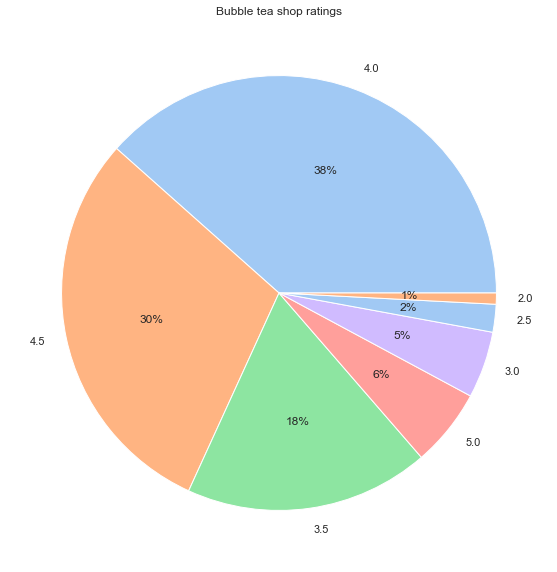

In [ ]:
rating_count = df['rating'].value_counts().to_frame().reset_index()
rating_count = rating_count.rename(columns={'index':'rating', 'rating':'count'})
rating_count
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12, 10))
plt.title('Bubble tea shop ratings')
plt.pie(rating_count['count'], labels = rating_count['rating'], colors = colors, autopct='%.0f%%');

We see that the majority of ratings are either 4 or 4.5 stars with 38% of ratings being 4 stars and 30% of ratings being 4.5 stars. This shows that Bubble tea shops are generally liked by the public but can we find out if other factors can affect shop ratings?

#### Distribution of Price

C:\Users\Jason\AppData\Local\Temp\ipykernel_47852\2229846704.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  plt.pie(price_count['count'], labels = price_count['name'].str.replace('\$', '\\$'), colors = colors, autopct='%.0f%%');


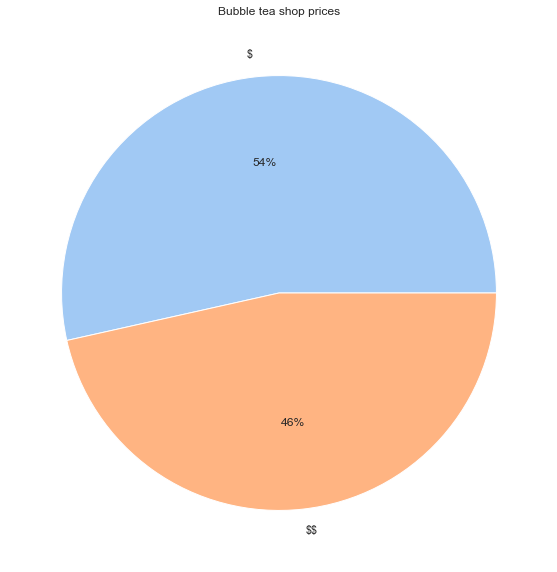

In [478]:
price_count = df['price'].value_counts().reset_index()
price_count = price_count.rename(columns={'index':'name', 'price':'count'})
# price_count
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12, 10))
plt.title('Bubble tea shop prices')
plt.pie(price_count['count'], labels = price_count['name'].str.replace('\$', '\\$'), colors = colors, autopct='%.0f%%');

As mentioned before, Yelp uses dollar signs (\$) to categorize approximate cost per person for a meal in a shop. In particular, "$" means under $10; “$$” means “$11-$30”; “$$$” means “$31-$60”; and “$$$$” means “above $61”. 

Bubble tea is a drink so it is no surprise the shops are only labeled with "$" and "$$". The price is split pretty even between "$" and "$$" with "$" having a slight edge. We can use this later to see if it has any correlation between price and average rating of Bubble tea shops.

C:\Users\Jason\AppData\Local\Temp\ipykernel_47852\461956764.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  sns.barplot(x = df['price'].str.replace('\$', '\\$'), y = "rating", data=df)


<AxesSubplot:xlabel='price', ylabel='rating'>

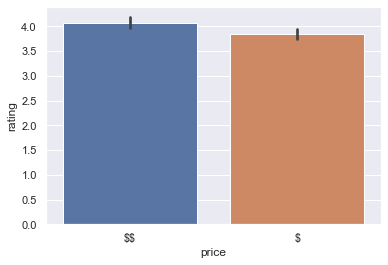

In [512]:
one_cost_df = df[df['price'] == '$']
two_cost_df = df[df['price'] == '$$']

one_cost_avg_rating = one_cost_df['rating'].mean()
two_cost_avg_rating = two_cost_df['rating'].mean()

sns.barplot(x = df['price'].str.replace('\$', '\\$'), y = "rating", data=df)

We see that more expensive Bubble tea shops have a higher average rating compared to cheaper ones.

                            name  rating  review_count
129  Teas'n You Fusion Tea House     4.5        1198.0
126        Teaism - Penn Quarter     3.5         778.0
99              SnoCream Company     4.5         756.0
101                     SnowBots     3.5         722.0
127         Teaism Dupont Circle     4.0         720.0
..                           ...     ...           ...
56            Juno Bakery & Cafe     4.5           2.0
138                   Utepia Tea     4.5           2.0
53      Jin Bubble Tea & Smothie     2.5           2.0
107   Sweeties Novelty Brewhouse     5.0           1.0
121                      Tea.com     2.0           1.0

[152 rows x 3 columns]


<module 'seaborn' from 'C:\\Users\\Jason\\AppData\\Roaming\\Python\\Python39\\site-packages\\seaborn\\__init__.py'>

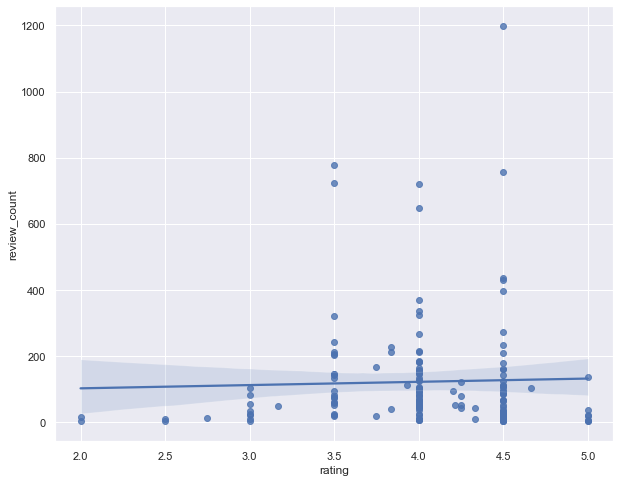

In [513]:
mean_rating = df.groupby(['name'])['rating'].mean()
mean_review_count = df.groupby(['name'])['review_count'].mean()

mean_rating_df = mean_rating.to_frame().reset_index()
mean_review_count_df = mean_review_count.to_frame().reset_index()

res = pd.merge(mean_rating_df, mean_review_count_df, on="name")
res.sort_values(by=['review_count'], ascending=False, inplace=True)
print(res)
sns.set_theme(color_codes=True)
plt.figure(figsize=(10,8))
sns.regplot(x = res['rating'], y = res['review_count']);
sns

<module 'seaborn' from 'C:\\Users\\Jason\\AppData\\Roaming\\Python\\Python39\\site-packages\\seaborn\\__init__.py'>

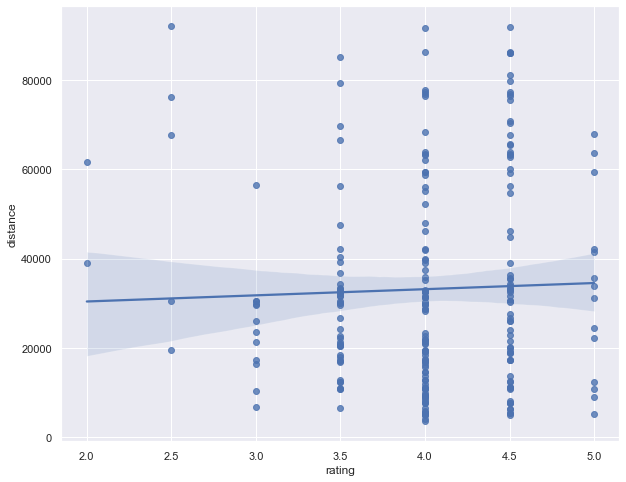

In [514]:
plt.figure(figsize=(10,8))
# sns.scatterplot(x = df['rating'], y = df['price'].str.replace('\$\$','\\$\\$'))
sns.regplot(x = 'rating', y = 'distance', data=df);
sns

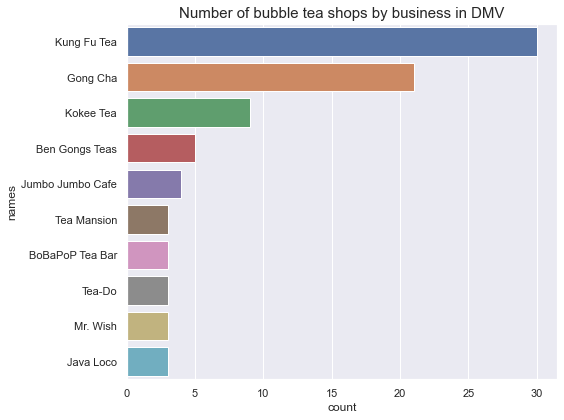

In [515]:
name_counts = df['name'].value_counts().reset_index(drop=False)
name_counts = name_counts.rename(columns={'index':'names', 'name':'count'})

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='count',
            y='names', 
            data=name_counts.head(10), 
            ax=ax)

plt.title('Number of bubble tea shops by business in DMV', fontsize=15)
plt.tight_layout()

Since we are given coordinates from our dataset. Let's plot it on a map so we can visualize it better.

In [516]:
map_osm = folium.Map(location=[38.90, -77.03], zoom_start=10)
# df['coordinates']
for _, shop in df.iterrows():
  if shop['rating'] == 5:
    folium.Marker(location=[shop['latitude'], shop['longitude']],
                icon=folium.Icon(color='beige'), popup=f'{shop["name"]} | {shop["rating"]}*').add_to(map_osm)
  elif shop['rating'] == 4 or shop['rating'] == 4.5 :
    folium.Marker(location=[shop['latitude'], shop['longitude']],
                icon=folium.Icon(color='purple'), popup=f'{shop["name"]} | {shop["rating"]}*').add_to(map_osm)
  elif shop['rating'] == 3 or shop['rating'] == 3.5 :
    folium.Marker(location=[shop['latitude'], shop['longitude']],
                icon=folium.Icon(color='blue'), popup=f'{shop["name"]} | {shop["rating"]}*').add_to(map_osm)
  elif shop['rating'] <= 2.5:
    folium.Marker(location=[shop['latitude'], shop['longitude']],
                icon=folium.Icon(color='red'), popup=f'{shop["name"]} | {shop["rating"]}*').add_to(map_osm)       

map_osm